# Exploratory Data Analysis on Google Analytics Cyclist Dataset

Use the "Run" button to execute the code.

# About the dataset

![cyclistics](https://drive.google.com/uc?id=1QCYTaUOxuKy85Bh31KrJByMMfX8zrD2z)

A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. 

# What is Exploratory Data Analysis for ?
![EDA](https://drive.google.com/uc?id=1x0qPGoV3KVMecqZrOHhpoy_0M2yCeEVx)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

In this project, I have selected **Google Analyst Cyclist Dataset** from kaggle to explore and analyze the trip plan of riders. We'll use the the python libraries [Pandas](https://pandas.pydata.org), [matplotlib](https://matplotlib.org), [seaborn](https://seaborn.pydata.org), [plotly](https://plotly.com/) and [folium](https://pypi.org/project/folium)to do exploratory data analysis on the cyclist dataset.

Below are the outline as well as squential steps taken to dig down to dataset:

1. Installation of required packages and their upgradation (if required).

2. Downloading the dataset from kaggle with the help of Kaggle account credential like username and api token.

3. Performing data preparation and cleaning with Pandas.

4. Open ended exploratory analysis & visualisation on columns.

5. Asking & Answering Questions.

6. Summarizing inferences and drawing conclusions.

# How to run the code
The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Binder. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on Google Colab or Kaggle to use these platforms. You can make changes and save your own version of the notebook to Jovian by executing the following cells.

Since the selected dataset contains 5+ million rows of data, I have selected "Gogle Colab" to execute the code for faster response.

When you are commiting the notebook to Jovian for the first time in "Colab" it will ask for API key which will be found in your Jovian account getstarted section.

# 1. Installing and importing required packages
![Python packages](https://drive.google.com/uc?id=1yZ8FD4jywEM4ynFkooEzdkwhdMf_0l2w)

From the variety of option for executing the code on Jupyternotebook,kaggle,binder to Google cloud platform Colab, with very minimistilic or no changes code can be executed on the just few click of run button ( with make sure availability of all required packages).

Since dataset contains 5.9M of rows and 18 columns, so choosing the platform which can facilitate better ram for computing could be better options for getting smother executions.

Whereas the downloading the dataset from the Kaggle as well as commiting the notebook requires "API " Keys which one could get from their respective account credential.

In the process of EDA we will be using multiple library like numpy,seaborn,pandas,wordcloud, opendatasets and plotly from python ecosystem. So let using python interpretor instalation to install the required packages

In [4]:
# installing the required packages
!pip install numpy pandas==1.1.5 wordcloud opendatasets matplotlib==3.1.3 seaborn plotly --upgrade --quiet

     |████████████████████████████████| 9.5 MB 8.6 MB/s 
     |████████████████████████████████| 13.1 MB 50.5 MB/s 
     |████████████████████████████████| 288 kB 55.5 MB/s 
     |████████████████████████████████| 15.3 MB 42.3 MB/s 


After installing required libraries we will import those libraries and utilized for required work.

In [5]:
# used to download a dataset from kaggle
import opendatasets as od
# Data analysis library in python
import pandas as pd
# numerical computing library
import numpy as np
# Python module named datetime used for working with dates as date objects
from datetime import datetime
# wordcloud tool can be used to generate clouds made up of large pool of words
from wordcloud import WordCloud
# for creating static visualizations in Python
import matplotlib.pyplot as plt
# a high-level interface for drawing informative statistical graphics.
import seaborn as sns
#for creating interactive visualizations
import plotly.express as px
# to create wordcloud in python
import wordcloud
# Avoid graphs to be shown as pop-up rather shown in same command line
%matplotlib inline
import matplotlib
from matplotlib import rcParams
#OS module in Python provides for interacting with the operating system
import os
from google.colab import files
from google.colab import drive

# 2. Downloading required dataset:
The dataset has been downloaded from kaggle using the kaggle account username and api_keys.

In [6]:
# assign dataset url to a variable
dataset_url = 'https://www.kaggle.com/datasets/sarfarazmulla/google-data-analytics-capstone-cyclistic'
# download the dataset using opendatasets from Kaggle
od.download(dataset_url) 
# kindly provide Kaggle credentials

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: agnihotrisachin
Your Kaggle Key: ··········


100%|██████████| 272M/272M [00:06<00:00, 47.2MB/s]


In [7]:
data_dir = 'google-data-analytics-capstone-cyclistic'
os.listdir(data_dir) # listdir in os shows the list of files in the given directory

['tripdata.csv']

In [8]:
# load the dataset and display the dataframe
raw_tripdata_df = pd.read_csv(data_dir + '/tripdata.csv') #to read & store the csv file in dataframe
raw_tripdata_df.columns #to list columns in dataframe

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'tripduration', 'day_of_week', 'month',
       'Distance_traveled in meter'],
      dtype='object')

In [9]:
raw_tripdata_df.shape #to know number of rows and columns in dataframe

(5901044, 18)

# 3. Performing data preparation and cleaning



## a. Data Preparation

 To do this, firstly, we have to check datatype of columns and then change to required datatype if found any column with unrelevant datatype.

In [10]:
raw_tripdata_df.info() # to view the basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901044 entries, 0 to 5901043
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   ride_id                     object 
 2   rideable_type               object 
 3   started_at                  object 
 4   ended_at                    object 
 5   start_station_name          object 
 6   start_station_id            object 
 7   end_station_name            object 
 8   end_station_id              object 
 9   start_lat                   float64
 10  start_lng                   float64
 11  end_lat                     float64
 12  end_lng                     float64
 13  member_casual               object 
 14  tripduration                object 
 15  day_of_week                 object 
 16  month                       object 
 17  Distance_traveled in meter  float64
dtypes: float64(5), int64(1), object(12)
memory usage: 810.4+ MB


From above cell output, we find that 'started_at', 'ended_at' have object datatype but these columns should have datetine datatype. So, we will convert datatype to desired by below cell code.

In [11]:
# converting the object type date column into datetime
raw_tripdata_df['started_at'] = pd.to_datetime(raw_tripdata_df['started_at'])
raw_tripdata_df['ended_at'] = pd.to_datetime(raw_tripdata_df['ended_at'])

Further, 'tripduration' has object datatype but it should have ti,e datatype. So, we have tried to convert its datatype but it shows error due to some unexpected values in column. 

raw_tripdata_df['tripduration'] = pd.to_datetime(raw_tripdata_df['tripduration']).dt.strftime('%H:%M:%S')

So, we have dropped this column and insert new column 'trip_duration' with calculated values as 'ended_at'-'started_at'. 

In [12]:
raw_tripdata_df['trip_duration'] = raw_tripdata_df['ended_at']-raw_tripdata_df['started_at']
raw_tripdata_df.drop('tripduration', inplace = True, axis = 1)

## b. Data Cleaning



### i. Removal of rows with Null values.
To do this, we will check number of null values for each column by isna().sum() function on dataframe as below.

In [13]:
raw_tripdata_df.isna().sum()

Unnamed: 0                         0
ride_id                            0
rideable_type                      0
started_at                         0
ended_at                           0
start_station_name            860760
start_station_id              860758
end_station_name              919662
end_station_id                919662
start_lat                          0
start_lng                          0
end_lat                         5590
end_lng                         5590
member_casual                      0
day_of_week                        0
month                              0
Distance_traveled in meter         0
trip_duration                      0
dtype: int64

Now, we found that 'start_station_name' has 860760 null values, 'start_station_id' has 860758 null values, 'end_station name'and 'end_station id' have 919662 null values each. Further, 'end_lat' and 'end_lng' have 5590 null values each. So, we will drop the rows which have these null values as below.

In [14]:
raw_tripdata_df = raw_tripdata_df.dropna()

### ii. Handle missing, incorrect and invalid data.
Distance_traveled in meter' column name is incorrect. So, we have to change it. 


In [15]:
raw_tripdata_df.rename(columns = {'Distance_traveled in meter':'Distance_traveled_in_meter'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We have to explore count, mean, standard deviation, minimum value, maximum value etc for each numeric column with describe() function of dataframe.

In [16]:
# to view the statistical values of numerical columns
raw_tripdata_df.describe()

,Unnamed: 0,start_lat,start_lng,end_lat,end_lng,Distance_traveled_in_meter,trip_duration
count,4.629053e+06,4.629053e+06,4.629053e+06,4.629053e+06,4.629053e+06,4.629053e+06,4629053
mean,1.962807e+05,4.190258e+01,-8.764433e+01,4.190286e+01,-8.764457e+01,2.110268e+03,0 days 00:15:53.156173195
std,1.371117e+05,4.150126e-02,2.499410e-02,4.163540e-02,2.437712e-02,1.950761e+03,0 days 20:37:07.477484104
min,0.000000e+00,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01,0.000000e+00,-236 days +00:03:24
25%,7.673000e+04,4.188189e+01,-8.765703e+01,4.188209e+01,-8.765804e+01,8.940506e+02,0 days 00:06:24
50%,1.754310e+05,4.189766e+01,-8.764122e+01,4.189776e+01,-8.764170e+01,1.594154e+03,0 days 00:11:13
75%,2.955900e+05,4.192676e+01,-8.762798e+01,4.192871e+01,-8.762798e+01,2.770028e+03,0 days 00:20:11
max,4.999980e+05,4.563503e+01,-7.379648e+01,4.216812e+01,-8.752740e+01,1.189522e+06,91 days 19:25:54


Now, from output we have found that 'Distance_traveled_in_meter' has minimum value zero. it means, it was not a trip as no distance covered. 
Further, 'trip_duration' has minimum value -235 days which is invalid. So, we will remove the rows where 'ended_at' is less than 'started_at' with below cell code.

In [17]:
raw_tripdata_df.drop(raw_tripdata_df[raw_tripdata_df.Distance_traveled_in_meter == 0].index, inplace=True)
raw_tripdata_df.drop(raw_tripdata_df[raw_tripdata_df.ended_at < raw_tripdata_df.started_at ].index, inplace=True)

Now, our dataframe is ready for analysis. Let's check number of rows and columns.

In [18]:
raw_tripdata_df.shape

(4399505, 18)

Ready dataframe have 4399505 rows and 18 columns.

As this dataframe has 4M rows. So, it needs high Ram and disk storage to process it. So, we fetch 200k random rows for our analysis with sample() function. If you have enough resources then you can skip this code and can apply analysis to complete dataframe.

In [19]:
#let's filter some required columns for our analysis to get a quick response.
rtripdata_df = raw_tripdata_df[['ride_id', 'rideable_type','started_at', 'ended_at', 'start_station_name','end_station_name','start_lat','start_lng','end_lat','end_lng','member_casual','day_of_week','Distance_traveled_in_meter','trip_duration']]
#let's select out 200k random rows for analysis.
tripdata_df = rtripdata_df.sample(200000)

In [20]:
tripdata_df.shape

(200000, 14)

In [ ]:
# to view the statistical values of numerical columns
tripdata_df.describe()

,start_lat,start_lng,end_lat,end_lng,Distance_traveled_in_meter,trip_duration
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000
mean,41.902769,-87.644483,41.903078,-87.644676,2214.953843,0 days 00:20:29.988905
std,0.040625,0.023514,0.040819,0.023756,1856.973335,0 days 05:54:05.835255809
min,41.648501,-87.820000,41.648579,-87.830000,0.000017,0 days 00:00:01
25%,41.881970,-87.657030,41.882134,-87.658040,1000.229396,0 days 00:06:28
50%,41.897576,-87.641697,41.897764,-87.641823,1661.022860,0 days 00:11:02
75%,41.926756,-87.629155,41.928712,-87.629155,2838.870566,0 days 00:19:28
max,42.064854,-87.528232,42.064854,-87.528232,25634.524200,30 days 22:18:05


In [ ]:
tripdata_df.isna().sum()

ride_id                       0
rideable_type                 0
started_at                    0
ended_at                      0
start_station_name            0
end_station_name              0
start_lat                     0
start_lng                     0
end_lat                       0
end_lng                       0
member_casual                 0
day_of_week                   0
Distance_traveled_in_meter    0
trip_duration                 0
dtype: int64

In [ ]:
tripdata_df.head(5) #first 5 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,Distance_traveled_in_meter,trip_duration
3638192,CA9078462079627D,electric_bike,2022-01-04 01:03:21,2022-01-04 01:13:32,Rush St & Cedar St,Clark St & Wrightwood Ave,41.902585,-87.627689,41.929546,-87.643118,member,Friday,3258.427385,0 days 00:10:11
3647566,92A2D20D51CA19D1,electric_bike,2022-04-23 15:38:00,2022-04-23 15:45:40,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,41.880975,-87.616801,41.880958,-87.616743,casual,Saturday,5.174100,0 days 00:07:40
1831298,4CB301E5DCFC0DB8,classic_bike,2021-10-17 11:15:25,2021-10-17 11:30:44,Clark St & North Ave,Clark St & Wrightwood Ave,41.911974,-87.631942,41.929546,-87.643118,casual,Sunday,2161.664367,0 days 00:15:19
2143486,C445735C7A09C7FE,electric_bike,2021-10-05 18:43:06,2021-10-05 18:57:57,Milwaukee Ave & Wabansia Ave,Sheffield Ave & Webster Ave,41.912603,-87.681426,41.921736,-87.654059,member,Tuesday,2481.710075,0 days 00:14:51
3432870,4E33DA1544D69A82,classic_bike,2022-04-15 18:13:05,2022-04-15 18:18:30,Lincoln Ave & Belle Plaine Ave,Damen Ave & Sunnyside Ave,41.956004,-87.680161,41.963250,-87.679258,casual,Friday,809.223137,0 days 00:05:25


# 4. Open ended exploratory analysis & visualisation on columns.
The data analysis helps us to understand the situation deeply, by digging into the data, so that we can find the "gold" in the data "mine" and tell the hidden stories. Meanwhile, data visualization empowers us to communicate stories more effectively.

Let's set the chart style, font size, figure size and figure facecolour using matplotlib. These are reflected only to matplot and seaborn charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Ride id
This column gives the unique ride id for each trip. Let's check all values are unique or having any duplicate value.

In [ ]:
tripdata_df.ride_id.nunique()

200000

**Result - It means all 200k trips have unique ride id.**

## Rideable types.
This column gives the rideable type (bike) used for trip by rider. Let's look the number of types used.

In [ ]:
tripdata_df.rideable_type.nunique()

3

In [ ]:
tripdata_df.rideable_type.unique() #for name of rideable types

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

Let's plot histogram to check no. of trips for which each rideable type has been used.

In [ ]:
px.histogram(tripdata_df, x="rideable_type", title='Rideable type vs used for no. for trip')

Output hidden; open in https://colab.research.google.com to view.

![rideable_types](https://drive.google.com/uc?id=1znrsFwYoIhXwHaVVPkaj6Ir4J055CZA3)

__Result - This graph states that classic bike are the most used and docked bike are the least.__

## Started_at
This column contains the starting date and time.
Let's plot histogram to check no. of trips for which each started time.

In [ ]:
px.histogram(tripdata_df, x="started_at", title='Started date & time vs used for no. for trip')

Output hidden; open in https://colab.research.google.com to view.

![started_at](https://drive.google.com/uc?id=16wYxkandraB_vf6VKsOUMHyENi374T4h)

__Result -this graph states that most trips are started in May-Oct of year.__

## ended_at
This column contains the ended date and time.
Let's plot histogram to check no. of trips for which each started time.

In [ ]:
px.histogram(tripdata_df, x="ended_at", title='Ended date & time vs used for no. for trip')

Output hidden; open in https://colab.research.google.com to view.

![ended_at](https://drive.google.com/uc?id=1Uu9Ug7AJ8hYXivXPe0vAKm94oCWkQ4qC)

__Result -this graph states that most trips are ended in May-Oct of year.__

## start_station_name
This column contains the start station name.

In [ ]:
start_station_counts = tripdata_df.start_station_name.value_counts() #to calculate the total number of trips started from start station.
start_station_counts.sort_values(ascending=False).head(10)

Streeter Dr & Grand Ave               3052
DuSable Lake Shore Dr & North Blvd    1857
Wells St & Concord Ln                 1728
DuSable Lake Shore Dr & Monroe St     1646
Michigan Ave & Oak St                 1611
Clark St & Elm St                     1585
Wells St & Elm St                     1545
Kingsbury St & Kinzie St              1529
Millennium Park                       1419
Theater on the Lake                   1400
Name: start_station_name, dtype: int64

Let's plot  wordcloud for this.

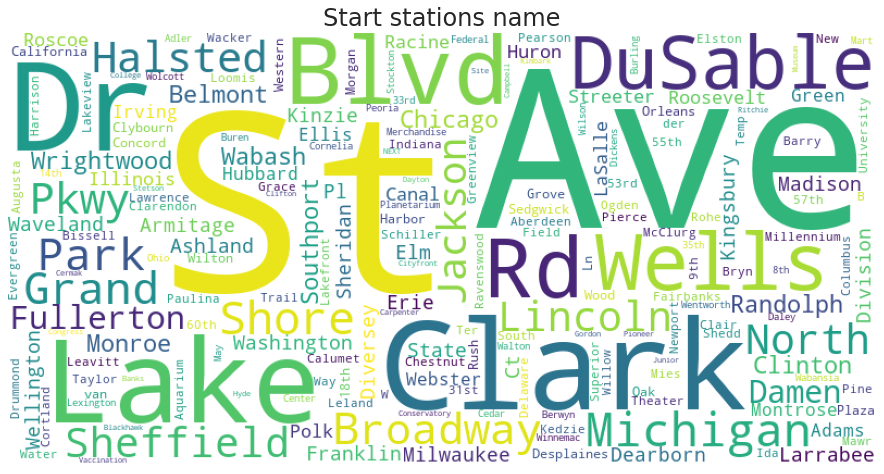

In [ ]:
words1 = ' '.join(start_station_name for start_station_name in tripdata_df.start_station_name)
wc1 = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(str(words1))
plt.figure(figsize=(40,8))
plt.axis("off")
plt.grid(False)
plt.title('Start stations name', fontsize=24)
plt.imshow(wc1);

![start_station](https://drive.google.com/uc?id=1KiAtvDEF8h7rk96jsiBu-IPDsR2IftZo)

__Result -In above figure, we can easily identify that 'st' word is mostly used in end station name, 'Ave' is on 2nd, 'clark', 'Blvd','Lake' are on 3rd (may be).__


## end_station_name
This column contains the end station name.

In [ ]:
end_station_counts = tripdata_df.end_station_name.value_counts() #to calculate the total number of trips ended from end station.
end_station_counts.sort_values(ascending=False).head(10)

Streeter Dr & Grand Ave               3035
DuSable Lake Shore Dr & North Blvd    2016
Wells St & Concord Ln                 1781
Michigan Ave & Oak St                 1656
DuSable Lake Shore Dr & Monroe St     1621
Millennium Park                       1584
Clark St & Elm St                     1528
Theater on the Lake                   1505
Wells St & Elm St                     1487
Kingsbury St & Kinzie St              1437
Name: end_station_name, dtype: int64

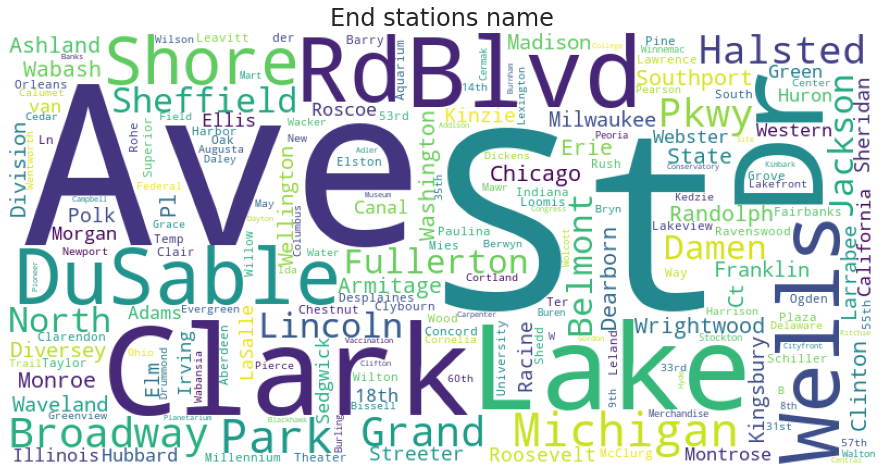

In [ ]:
from wordcloud import WordCloud
words = ' '.join(end_station_name for end_station_name in tripdata_df.end_station_name)
wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(str(words))
plt.figure(figsize=(40,8))
plt.axis("off")
plt.grid(False)
plt.title('End stations name', fontsize=24)
plt.imshow(wc);

![end_station](https://drive.google.com/uc?id=1enLv-gNvd-LUKMGlHtxwjFSKNr-ERrpB)

__Result - In above figure, we can easily identify that 'st' word is mostly used in end station name, 'Ave' is on 2nd, 'clark','Blvd' is on 3rd (may be).__

## member_casual
This column contains the type od rider if he is member or casual rider.
Let's plot histogram to check no. of trips for which each type of rider.

In [ ]:
px.histogram(tripdata_df, x="member_casual", title='Rider type vs no. for trip',width=300, height=400)

Output hidden; open in https://colab.research.google.com to view.

![member_casual](https://drive.google.com/uc?id=1sSbI7Y7g__K_JXtoXVHNuuwxyxyHKmfN)

__Result - This shows that 117858 (approx 60%) are the members whereas balance 82142 (approx 40%) are the causal rider.__

## day_of_week
This column contains the weekday for each ride. Let's plot histogram to check no. of trips for which each weekday.

In [ ]:
px.histogram(tripdata_df, x="day_of_week", title='Day of week vs no. for trip',width=500, height=400)

Output hidden; open in https://colab.research.google.com to view.

![weekday](https://drive.google.com/uc?id=1-9E_tz0KK2o85fem0neBTAZxsEwelubY)

__Result - It shows that most trips are on Saturday and least on Monday.__

## Distance_traveled_in_meter
This column contains the distance travelled for each ride. Let's plot histogram with box plot to distance travelled.

In [ ]:
px.histogram(tripdata_df, x="Distance_traveled_in_meter", marginal="box", title='Distance_traveled_in_meter vs no. of trips')

Output hidden; open in https://colab.research.google.com to view.

![Distance_travelled](https://drive.google.com/uc?id=1Ncvzxx0rGT83cQY0_uetKhMZyxEamPXO)

__Result - From figure, we can say that there are so many outliers. Maximum distance is approx 30,000 meters whereas median is approx 1662 meters.__

## trip_duration
This column contains the trip duration for each ride. Let's plot histogram with box plot to distance travelled.

In [ ]:
px.histogram(tripdata_df, x="trip_duration", marginal="box", title='Trip duration vs no. of trips')

Output hidden; open in https://colab.research.google.com to view.

![trip_duration](https://drive.google.com/uc?id=1hMsg8tyjQbsZfdlgVwekWVve9-7vAyot)

__Result - From graph, we can see that there are so many outliers and difference in values are too much. So, lets check min and max value.__

In [ ]:
#Maximum trip duration
tripdata_df['trip_duration'].max()

Timedelta('30 days 01:43:31')

In [ ]:
#Minimum trip duration
tripdata_df['trip_duration'].min()

Timedelta('0 days 00:00:01')

# 5. Asking & Answering Questions.

### Question 1. Show the percentage of trips done with various rideable types?

In [ ]:
rideable_type_counts = tripdata_df.rideable_type.value_counts() #to calculate the tottal number of trips done with each rideable types.
rideable_type_counts

classic_bike     130383
electric_bike     61418
docked_bike        8199
Name: rideable_type, dtype: int64

Let's plot pi-chart to show the percentage of trips for each rideable types.

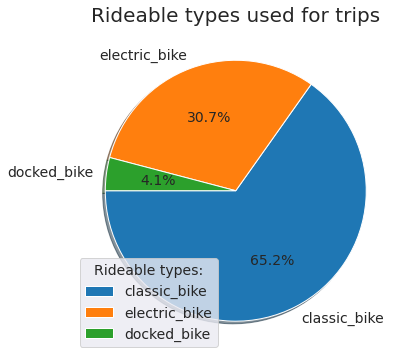

In [ ]:
plt.figure(figsize=(12,6)) 
plt.title('Rideable types used for trips', fontsize = 20)
plt.pie(rideable_type_counts, labels=rideable_type_counts.index, autopct='%1.1f%%', shadow = True, startangle=180)
#autopct is for rounding off to desired decimal.
plt.legend()
plt.legend(title = "Rideable types:");

![1](https://drive.google.com/uc?id=1i_PiHXAt-f6yIqM1B3U1aIpEzxqLzFO-)

__Result -  From above pi-chart, we can easily see that most of the riders used classic bike and a few riders has used docked bike for riding a trip.__

### Question 2. Show the percentage or total number of trips per week of the day?



In [ ]:
day_of_week_counts = tripdata_df.day_of_week.value_counts() #to calculate the total number of trips done in each day of week.
day_of_week_counts

Saturday       33468
Sunday         30322
Thursday       28371
Wednesday      27582
Tuesday        27224
Friday         27171
Monday         25862
Name: day_of_week, dtype: int64

Let's plot pi-chart for this information.

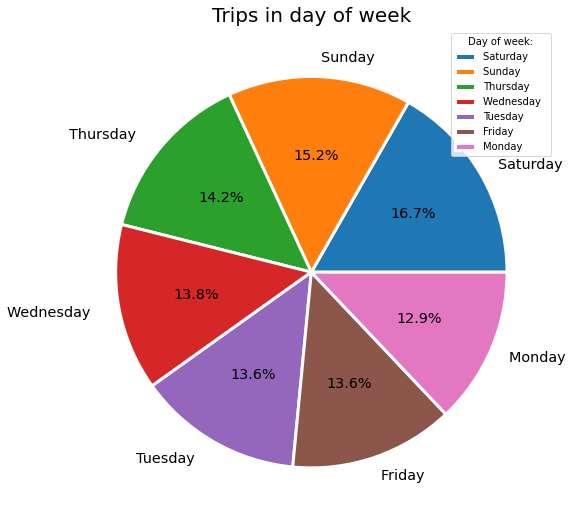

In [ ]:
plt.figure(figsize=(18,9))
plt.title('Trips in day of week', fontsize = 20)
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct= '%1.1f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'size': 'x-large'}, startangle=00)
plt.legend()
plt.legend(title = "Day of week:");

![2](https://drive.google.com/uc?id=1mGrx3I-ytBBnsku7b42ccuAftmtq3lQZ)

__Result - From above pi-chart, we can see that maximum number of rides done on saturday & least on Monday.__

### Question 3. plot the total number of trips by each rideable types. Further, show the percentage, how much trips done by member or casual riders?

Lets plot sunbrust pi chart for the required information.

In [ ]:
trp_df = tripdata_df[['rideable_type','trip_duration','member_casual','Distance_traveled_in_meter']] #creating sub dataframe with required columns.
trp_df1 = trp_df.groupby(['rideable_type','member_casual']).size().reset_index(name='trp_count') #perform groupping .
figa = px.sunburst(trp_df1, 
                 path=['rideable_type', 'member_casual'], 
                 values='trp_count',
                 title = 'Total no. of trips & rideable type vs member/casual', 
                 color_continuous_scale='RdBu')
figa.update_traces(textinfo="label+percent parent")
figa.update_layout(
    autosize=False,
    height=500,
    width=500)
figa.show()

![3](https://drive.google.com/uc?id=1-4LapOMXYRfKPW-lLBIx1nNllWitcukV)

__Result - From above chart, we can see that__ 

__1. 65% trips had been done by classic bike out of which 64% by member and 36% by caual riders.__

__2. 31% trips had been done by electric bike out of which 56% by member and 44% by caual riders.__

__3. 4% trips had been done by docked bike and all are done by caual riders.__

### Question 4. Plot the total number of trips in month of year and further, split/show how many trips has to be completed in day of week?

To do this, firstly we have to add a column with month and year value. Further, have to plot treemap chart.

In [ ]:
trip_df = tripdata_df[['rideable_type','started_at','ended_at','trip_duration','day_of_week','Distance_traveled_in_meter']] #creating of sub dataframe with required fields.
#Lets add a new column to sub dataframe with month and year value.
trip_df['month_year'] = pd.to_datetime(trip_df['started_at']).dt.strftime('%m/%y') 
trip_df1 = trip_df.groupby(['month_year','day_of_week']).size().reset_index(name='trip_count') #Grouping performed.
trip_df1.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month_year,day_of_week,trip_count
0,01/22,Friday,838
1,01/22,Monday,556
2,01/22,Saturday,463


Let's plot above information in treemap as below.

In [ ]:
figtree = px.treemap(trip_df1, 
                 path=['month_year', 'day_of_week'], 
                 values='trip_count',
                 color='trip_count', 
                 title = 'Total number of trips & month of year vs day of week',
                 color_continuous_scale='RdBu')
figtree.show()

![4](https://drive.google.com/uc?id=1FaZPli8ecToBSGx7DK5-knRGZX6iuEyX)

__Result - From above charts, we can see that maximum trips has to be done in August whereas least in January. So, we can analyse that riders prefer mild summers for trips.__

### Question 5. Plot the total number of trips in day of week done by each rideable type?

Lets plot the histogram for this information.

In [ ]:
df1 = pd.DataFrame(tripdata_df, columns = ['day_of_week','rideable_type']) #Creating sub dataframe with required columns.

In [ ]:
fig = px.histogram(df1, x="day_of_week", color = "rideable_type", 
              title='Trips by rideable type in day of week', 
              width=700, height=500)
fig.update_layout(yaxis_title='Number of trips', 
                  xaxis_title = 'Day of week',
                  legend_title='Rideable Type', 
                  plot_bgcolor='aliceblue',
                  font=dict(
                    family="Arial",
                    size=14,
                    color="#cc3e0e"))
fig.update_yaxes(rangemode='tozero')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

![Ques5](https://drive.google.com/uc?id=1xuzh3wWvZPs7awGPmsaZfhywbB9ov9up)

__Result - So, maximum trips done on saturday and out of which approx. 30% trips done by electric bike, 65% by classic bike and 5% by docked bike.__

### Question 6. Plot the numbere of trips done by rideable types in month of year?

Let's plot Histogram for required information in this question.

In [ ]:
fig1 = px.histogram(trip_df, x="month_year", marginal="rug", color = "rideable_type", 
              title='Trips by rideable type in month of year', 
              width=1000, height=600)
fig1.update_layout(yaxis_title='Number of trips', 
                  xaxis_title = 'Month of year',
                  legend_title='Rideable Type', 
                  plot_bgcolor='aliceblue',
                  font=dict(
                    family="Arial",
                    size=14,
                    color="#cc3e0e"))
fig1.update_yaxes(rangemode='tozero')
fig1.show()

Output hidden; open in https://colab.research.google.com to view.

![Ques6](https://drive.google.com/uc?id=1hQfBDTq30yqB8PMl6iDfxqvedG2kiG3K)

__Result -  From above chart, we can see that in August month maximum trips has to be done and out of which approx. 30% trips done by electric bike, 65% by classic bike and 5% by docked bike.__

### Question 7. Plot distance travelled with each rideable types?

For this, we will plot boxplot.

[Text(0.5, 1.0, 'Distance travelled in meter vs rideable type')]

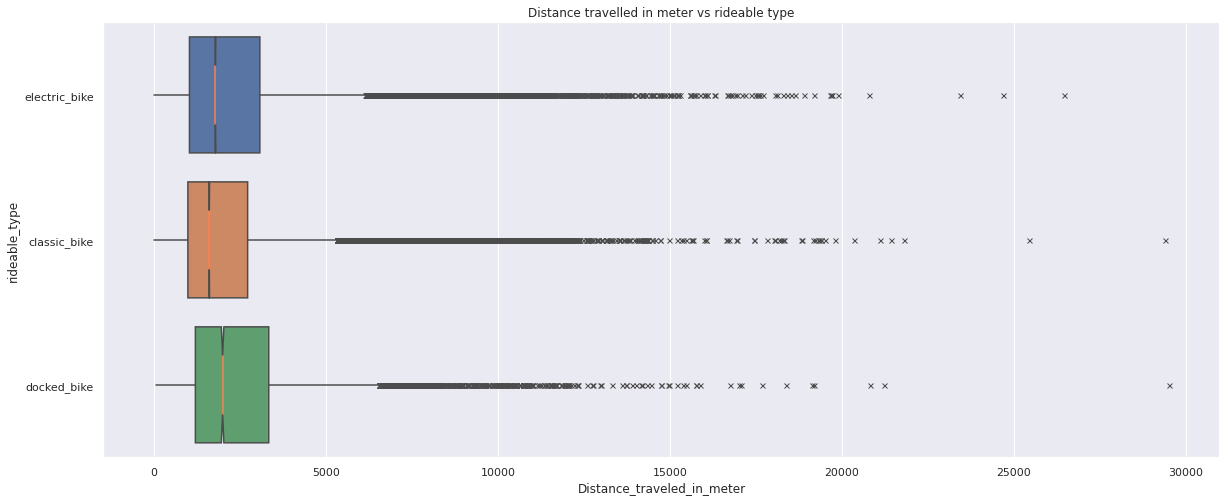

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(x=trip_df["Distance_traveled_in_meter"], y=trip_df['rideable_type'],
            notch=True, showcaps=False,
            flierprops={"marker": "x"},
            medianprops={"color": "coral"}).set(title='Distance travelled in meter vs rideable type')

![7](https://drive.google.com/uc?id=1W-GWiBqRUf9y_6hxLuM2Vy41SqPvXokd)

__Result - From above figure, we can see that most of riders take a trip of approx./average 3500 meters. But still there are so many outlierswho takes a trip of 30000meters/30kms or more.__

### Question 8. Plot relationship between trip duration and found which rideable type have completed most longest trip?  

In [ ]:
month_trip_df = tripdata_df[['rideable_type','started_at','ended_at','trip_duration','member_casual','Distance_traveled_in_meter']]

In [ ]:
duration_df = month_trip_df
duration_df['trip_duration_in_sec'] = pd.to_timedelta(month_trip_df['trip_duration']).view(np.int64) / 1e9
duration_df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rideable_type,started_at,ended_at,trip_duration,member_casual,Distance_traveled_in_meter,trip_duration_in_sec
3972595,electric_bike,2022-05-02 11:43:13,2022-05-02 11:48:46,0 days 00:05:33,member,1078.944806,333.0
1805199,classic_bike,2021-10-25 17:33:19,2021-10-25 17:57:12,0 days 00:23:53,member,5855.685951,1433.0
745995,classic_bike,2021-08-07 08:58:53,2021-08-07 09:11:11,0 days 00:12:18,member,2231.352407,738.0


In [ ]:
fig = px.box(duration_df, x="trip_duration_in_sec", y="rideable_type", points="all",color="member_casual",
             notched=True, # used notched shape
             title="Trip duration in seconds vs rideable type",
             hover_data=["trip_duration_in_sec"], log_x=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

![8](https://drive.google.com/uc?id=1-TQJsfPM8zzGTijGSwIz9klrlAl8ALhk)

__Result - From above graph, we can see that electric bike and classic bike both have done approx same long trips (approx 2.5M sec) but docked bike trip duration is longest (approx 2.65M sec).__

### Question 9. Which rideable type is the fastest?

To answer this question, lets plot graph between distance travelled and trip duration.

In [ ]:
px.scatter(duration_df, 
           x="trip_duration_in_sec", 
           y="Distance_traveled_in_meter", 
           color="rideable_type",
           title="Trip duration in seconds vs distance travelled in meters",
           size='trip_duration_in_sec',
           hover_data=['Distance_traveled_in_meter'])

Output hidden; open in https://colab.research.google.com to view.

![9](https://drive.google.com/uc?id=1pjhYbGrq_392iuJ_6wKNjjeuzWlKMUVb)

__Result - From graph, we can see that fastest trip has to be completed by docked bike and slowest trip by classic bike.__

### Question 10. Find the largest, smallest, most frequent and least frequent route & plot starting and ending point.

First of all, let's find longitude and lattitude of starting and end points for largest route by distance travelled.

In [21]:
longest_df=tripdata_df.query('Distance_traveled_in_meter == Distance_traveled_in_meter.max()')
longest_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,Distance_traveled_in_meter,trip_duration
1741392,9FEDD3F80FB39F98,electric_bike,2021-10-16 14:57:54,2021-10-16 17:05:56,Kimbark Ave & 53rd St,Chicago Ave & Sheridan Rd,41.799546,-87.594565,42.050492,-87.677779,casual,Saturday,28740.60491,0 days 02:08:02


In [26]:
!pip install folium --quiet --upgrade
import folium

     |████████████████████████████████| 96 kB 3.9 MB/s 


In [75]:
m = folium.Map(location=[41.90,-87.65], zoom_start=10,
               width = 400, height = 400, 
               tiles = 'OpenStreetMap', center = [41.90,-87.65])
folium.Marker(location=[longest_df['start_lat'], longest_df['start_lng']],popup=longest_df['start_station_name'],tooltip='Starting point of longest trip',icon=folium.Icon(color='green',icon='none')).add_to(m)
folium.Marker(location=[longest_df['end_lat'], longest_df['end_lng']],popup=longest_df['end_station_name'],tooltip='Ending point pf most longest trip',icon=folium.Icon(color='red',icon='none')).add_to(m)
m

Now, let's find smallest route.

In [22]:
smallest_df=tripdata_df.query('Distance_traveled_in_meter == Distance_traveled_in_meter.min()')
smallest_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,Distance_traveled_in_meter,trip_duration
1421334,50042475FA7C2C9A,classic_bike,2021-09-29 15:50:19,2021-09-29 16:11:16,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Wednesday,0.000017,0 days 00:20:57
1417347,5E5019007BBAC989,classic_bike,2021-09-18 20:33:16,2021-09-18 20:34:19,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Saturday,0.000017,0 days 00:01:03
1422007,BCF9EF13507DF4FF,classic_bike,2021-09-28 14:34:51,2021-09-28 14:58:52,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Tuesday,0.000017,0 days 00:24:01
1421990,A25CE6250A0AD9B0,classic_bike,2021-09-06 22:36:29,2021-09-06 22:51:22,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Monday,0.000017,0 days 00:14:53
1421980,254DDB3347F28D3E,classic_bike,2021-09-12 13:44:20,2021-09-12 13:44:55,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,member,Sunday,0.000017,0 days 00:00:35
1417256,01F7CCDEF33B6F52,classic_bike,2021-09-20 12:50:02,2021-09-20 14:13:02,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Monday,0.000017,0 days 01:23:00
1417199,D9A4DB7708695AD1,classic_bike,2021-09-02 14:37:55,2021-09-02 16:23:01,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Thursday,0.000017,0 days 01:45:06
1420680,27706A50ED89747C,classic_bike,2021-09-05 17:35:58,2021-09-05 17:59:50,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,casual,Sunday,0.000017,0 days 00:23:52
1417411,597D2336F927FD04,classic_bike,2021-09-06 13:07:22,2021-09-06 13:53:12,Shedd Aquarium,Shedd Aquarium,41.867226,-87.615355,41.867226,-87.615355,member,Monday,0.000017,0 days 00:45:50


__Now, from result, we can see that smallest distance travelled is 0.000017 meter which is impossible to plot starting and ending on geographical map. So, it will be visible as single point.__

In [56]:
m3 = folium.Map(location=[41.79,-87.60], zoom_start=10,
               width = 400, height = 400, 
               tiles = 'OpenStreetMap', center = [41.79,-87.60])
for i in range(0,len(smallest_df)):
  folium.Marker(location=[smallest_df.iloc[i]['start_lat'], smallest_df.iloc[i]['start_lng']],popup=smallest_df.iloc[i]['start_station_name'],tooltip='Starting point of smallest trip',icon=folium.Icon(color='green',icon='none')).add_to(m3)
  folium.Marker(location=[smallest_df.iloc[i]['end_lat'], smallest_df.iloc[i]['end_lng']],popup=smallest_df.iloc[i]['end_station_name'],tooltip='Ending point pf most smallest trip',icon=folium.Icon(color='red',icon='none')).add_to(m3)
m3

Now, lets find most frequently travelled path.

In [23]:
trd_df = tripdata_df
trd_df = trd_df.groupby(['start_station_name','end_station_name','start_lng','start_lat','end_lng','end_lat']).size().reset_index(name='trp_count') #Grouping performed.
mostfreq_df = trd_df.sort_values(by=['trp_count'], ascending=False)
mostfreq_df.head(3)

,start_station_name,end_station_name,start_lng,start_lat,end_lng,end_lat,trp_count
39043,Ellis Ave & 60th St,University Ave & 57th St,-87.601073,41.785097,-87.599861,41.791478,269
38963,Ellis Ave & 60th St,Ellis Ave & 55th St,-87.601073,41.785097,-87.601450,41.794301,267
97153,University Ave & 57th St,Ellis Ave & 60th St,-87.599861,41.791478,-87.601073,41.785097,243


In [43]:
m1 = folium.Map(location=[41.79,-87.60], zoom_start=15,
               width = 400, height = 400, 
               tiles = 'OpenStreetMap', center = [41.79,-87.60])
folium.Marker(location=[mostfreq_df.iloc[0]['start_lat'], mostfreq_df.iloc[0]['start_lng']],popup=mostfreq_df.iloc[0]['start_station_name'],tooltip='Starting point of most frequent trip',icon=folium.Icon(color='green',icon='none')).add_to(m1)
folium.Marker(location=[mostfreq_df.iloc[0]['end_lat'], mostfreq_df.iloc[0]['end_lng']],popup=mostfreq_df.iloc[0]['end_station_name'],tooltip='Ending point pf most most frequent trip',icon=folium.Icon(color='red',icon='none')).add_to(m1)
m1

Now, lets find least frequent travelled path.

In [59]:
leastfreqt_df=mostfreq_df.query('trp_count == 1')
leastfreqt_df

,start_station_name,end_station_name,start_lng,start_lat,end_lng,end_lat,trp_count
76317,Paulina St & Flournoy St,Wood St & Augusta Blvd,-87.669392,41.873034,-87.672179,41.899075,1
62425,Loomis St & Lexington St,Ashland Ave & Grand Ave,-87.661501,41.872187,-87.666611,41.891072,1
75990,Paulina St & 18th St,Clinton St & Jackson Blvd,-87.668745,41.857901,-87.640981,41.878317,1
68789,Mies van der Rohe Way & Chicago Ave,Green St & Madison St,-87.621758,41.896945,-87.648789,41.881892,1
77143,Pine Grove Ave & Irving Park Rd,Ritchie Ct & Banks St,-87.648119,41.954377,-87.626708,41.906624,1
...,...,...,...,...,...,...,...
40795,Federal St & Polk St,Sangamon St & Washington Blvd,-87.629392,41.872175,-87.651100,41.883165,1
40794,Federal St & Polk St,Sangamon St & Washington Blvd,-87.629494,41.872136,-87.650840,41.883128,1
40792,Federal St & Polk St,Rush St & Hubbard St,-87.629544,41.872078,-87.626185,41.890173,1
40791,Federal St & Polk St,Rush St & Hubbard St,-87.629619,41.872176,-87.626427,41.890014,1


__From above result, we can see that 86143 paths are used once. If we plot starting & ending points of these paths, it become too messy on grographical map also takes a very long time to plot. So, we select 100 top rows and plot as in below graph.__

In [60]:
leastfreq_df=leastfreqt_df.head(100)

In [76]:
m2 = folium.Map(location=[41.65,-87.60], zoom_start=11,
               width = 800, height = 800, 
               tiles = 'OpenStreetMap', center = [41.85,-87.60])
for i in range(0,len(leastfreq_df)):
  folium.Marker(location=[leastfreq_df.iloc[i]['start_lat'], leastfreq_df.iloc[i]['start_lng']],popup=leastfreq_df.iloc[i]['start_station_name'],tooltip='Starting point of least frequent trip',icon=folium.Icon(color='green',icon='none')).add_to(m2)
  folium.Marker(location=[leastfreq_df.iloc[i]['end_lat'], leastfreq_df.iloc[i]['end_lng']],popup=leastfreq_df.iloc[i]['end_station_name'],tooltip='Ending point pf most least frequent trip',icon=folium.Icon(color='red',icon='none')).add_to(m2)
m2

# 6. Summarizing inferences and drawing conclusions.

We've drawn many inferences from the trip dataset. Here's a summary of a few of them:
1. Most of the riders prefer to ride on classic bike and a few used docked bike. However, no member had used docked bike for riding.
2. Max riders used to trip on Saturday and least on Monday.
3. Maximum trips had been done in May to October. So, we can say that riders used to trip in mild summer days.
4. Maximum people used to trip for approx 3500 meters. However, a few had tripped for more than 20k meters.
5. Docked bike used to trip for long duration. So, it can be interpreted that their speed will be sloer than classic bike and electric bike.

# Future works
As a next step, we can do below.
1. We can do more detailed analysis on complete dataset of 5.4M rows.
2. We can analyze longitude, lattitude of start point, end point to see the common paths for different routes.
3. we can add grographical & whether data based on longitude and lattitude & can analyze most difficult track.
4.  We can analyse the whether on day of trip to further analyze the sloest and fastest trips.

# Refrences
* https://www.kaggle.com/datasets/sarfarazmulla/google-data-analytics-capstone-cyclistic
* https://pandas.pydata.org/docs/user_guide/index.html
* https://matplotlib.org/3.3.1/users/index.html
* https://seaborn.pydata.org/tutorial.html
* https://github.com/JovianML/opendatasets
* https://stackoverflow.com
* https://plotly.com/python
* https://www.geeksforgeeks.org
* https://medium.com

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-2-cyclistic-exploratory-data-analysis-by-sachin-tyagi")


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sachintyagi0009/project-2-cyclistic-exploratory-data-analysis-by-sachin-tyagi


'https://jovian.ai/sachintyagi0009/project-2-cyclistic-exploratory-data-analysis-by-sachin-tyagi'